# Tensorflow

A Deep Learning framework developed by Google that, much like PyTorch, defines many functions and classes revolving around the concept of tensors.

In [1]:
import tensorflow as tf

# 1. Creating Constant Tensors

The tf.constant defines an immutable tensor.

In [110]:
# Scalar
t1 = tf.constant(4)
print(f't1:\n{t1}\n')

# List
t2 = tf.constant([1,2,3])
print(f't2:\n{t2}\n')

# Vector -> use shape to turn it into a column vector
t3 = tf.constant([1,2,3], shape=(3,1))
print(f't3:\n{t3}\n')

# Matrix -> use shape to turn it into a 2x2 matrix
t4 = tf.constant([1,2,3,4], shape=(2,2))
print(f't4:\n{t4}\n')

# 3-d Tensor -> use shape to turn it into a 2x2x2 tensor
t5 = tf.constant([1,2,3,4,5,6,7,8], shape=(2,2,2))
print(f't5:\n{t5}\n')

t1:
4

t2:
[1 2 3]

t3:
[[1]
 [2]
 [3]]

t4:
[[1 2]
 [3 4]]

t5:
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]



In [34]:
# Constant tensor with ones
x = tf.ones((3,3))
print(x)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)


In [35]:
# Constant tensor with zeros
x = tf.zeros((4,1))
print(x)

tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]], shape=(4, 1), dtype=float32)


In [42]:
# Constant tensor with identity
x = tf.eye(5,5)
print(x)

tf.Tensor(
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]], shape=(5, 5), dtype=float32)


In [44]:
# Constant tensor with normal distribution
x = tf.random.normal((4,2), mean=5, stddev=3)
print(x)

tf.Tensor(
[[4.1964746 5.370441 ]
 [3.8358815 6.837245 ]
 [2.5299244 1.7602353]
 [3.984801  3.8919837]], shape=(4, 2), dtype=float32)


In [48]:
# Constant tensor with uniform distribution from -2 to 2
x = tf.random.uniform((4,2), minval=-2, maxval=2)
print(x)

tf.Tensor(
[[ 0.2974553  -1.0859652 ]
 [-1.3026686  -0.14749098]
 [-1.2121253   1.2175336 ]
 [ 1.5908442   0.5023737 ]], shape=(4, 2), dtype=float32)


In [60]:
# Changing dtype
x_float = tf.random.uniform((1,3), minval=-10, maxval=10)
print(x_float)

# Using cast to make it into a double
x_double = tf.cast(x_float, dtype=tf.float64)
print(x_double)

# Using cast to make it into an integer
x_int = tf.cast(x_float, dtype=tf.int32)
print(x_int)

# Creating a tensor with integers at initialization
x_int_start = tf.random.uniform((1,3), minval=-10, maxval=10, dtype=tf.int32)
print(x_int_start)

tf.Tensor([[6.9481964 2.505844  7.828457 ]], shape=(1, 3), dtype=float32)
tf.Tensor([[6.94819641 2.50584412 7.82845688]], shape=(1, 3), dtype=float64)
tf.Tensor([[6 2 7]], shape=(1, 3), dtype=int32)
tf.Tensor([[-9  4  0]], shape=(1, 3), dtype=int32)


# 2. Basic Operations with Constant Tensors

In [97]:
t1 = tf.random.uniform((3,), minval=5, maxval=10)
t2 = tf.random.normal((3,))

print(f't1 = {t1}')
print(f't2 = {t2}\n')

# Addition
print(f'- t1 + t2 = {t1+t2}')

# Subtraction
print(f'- t1 - t2 = {t1-t2}')

# Element-wise Product
print(f'- t1 .* t2 = {t1*t2}')

# Element-wise Division
print(f'- t1 ./ t2 = {t1/t2}')

# Element-wise Division
print(f'- t1 .^ t2 = {t1**t2}')

# Dot Product 1
print(f'- <t1,t2> = {tf.reduce_sum(t1*t2)}')

# Dot Product 2
print(f'- <t1,t2> = {tf.tensordot(t1, t2, axes=1)}')

t1 = [7.1517324 8.333276  9.860048 ]
t2 = [ 1.9463013  -0.19982092 -1.9323905 ]

- t1 + t2 = [9.098034 8.133455 7.927658]
- t1 - t2 = [ 5.205431   8.533096  11.7924385]
- t1 .* t2 = [ 13.919427   -1.6651628 -19.053463 ]
- t1 ./ t2 = [  3.6745248 -41.70372    -5.1025133]
- t1 .^ t2 = [4.6019489e+01 6.5463883e-01 1.2007087e-02]
- <t1,t2> = -6.799199104309082
- <t1,t2> = -6.799199104309082


In [108]:
t1 = tf.random.uniform((2,2), minval=5, maxval=10)
t2 = tf.random.normal((2,2))

print(f't1:\n{t1}\n')
print(f't2:\n{t2}\n')

print(f'Matrix multiplication (t1@t2):\n{t1@t2}\n')

print(f'Transpose (t1.T):\n{tf.transpose(t1)}')

t1:
[[6.155752  7.6459904]
 [8.8012295 6.7911696]]

t2:
[[0.48377177 0.29229233]
 [0.3863748  0.97778475]]

Matrix multiplication (t1@t2):
[[5.932197 9.275412]
 [6.881723 9.212834]]

Transpose (t1.T):
[[6.155752  8.8012295]
 [7.6459904 6.7911696]]


# 3. Simple Neural Network

We'll create a very simple model to classify pics of handwritten digits using the famous MNIST dataset.

In [126]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

Let's load the MNIST dataset.

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


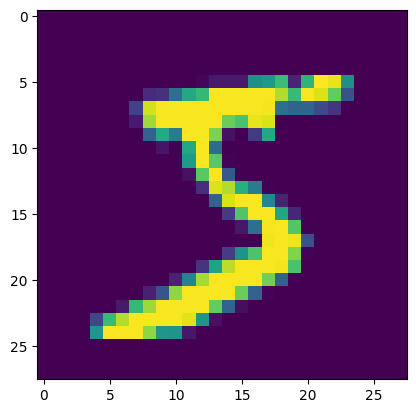

In [129]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')

plt.imshow(x_train[0])
plt.show()

There are 3 simple ways to create models in tensorflow / keras:

In [211]:
# Method 1: Using a list of layers
model_1 = keras.Sequential(
    [
        keras.Input(shape=(28,28)),           # tells the model what shape to expect
        layers.Flatten(),                     # flattens the image to 1-D
        layers.Dense(100, activation='relu'),  # dense layer from the flattened image to 10 neuros (1 for each digit)
        layers.Dense(10)
    ]
)

model_1.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_35 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [188]:
# Method_2: First creating an empty sequential, then adding each layer
model_2 = keras.Sequential()
model_2.add(keras.Input(shape=(28,28)))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(100, activation='relu'))
model_2.add(layers.Dense(10))

model_2.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_32 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [190]:
# Method_3:  Using a functional structure
inputs = keras.Input(shape=(28,28))
x = layers.Flatten()(inputs)
x = layers.Dense(100, activation='relu')(x)
outputs = layers.Dense(10)(x)

model_3 = keras.Model(inputs=inputs, outputs=outputs)

model_3.summary()

Model: "functional_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_31 (InputLayer)     │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_34 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Now, let's train the model

In [197]:
model_1.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(learning_rate=1e-3),
    metrics = ['accuracy']
)

model_1.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 574us/step - accuracy: 0.9634 - loss: 0.1539
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 557us/step - accuracy: 0.9600 - loss: 0.1685
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - accuracy: 0.9618 - loss: 0.1518
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step - accuracy: 0.9605 - loss: 0.1589
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step - accuracy: 0.9633 - loss: 0.1512
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step - accuracy: 0.9625 - loss: 0.1566
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 561us/step - accuracy: 0.9633 - loss: 0.1500
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - accuracy: 0.9667 - loss: 0.1384
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step - accuracy: 0.9654 - loss: 0.1462
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 546us/step - accuracy: 0.9641 - loss: 0.1475


And evaluate it on the test set

In [198]:
model_1.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.9385 - loss: 0.4350


[0.38162052631378174, 0.9467999935150146]

Finally, we can use the model for predictions

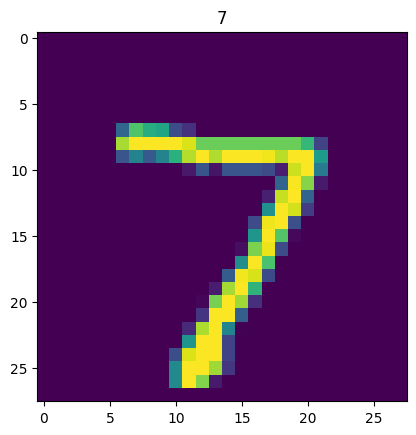

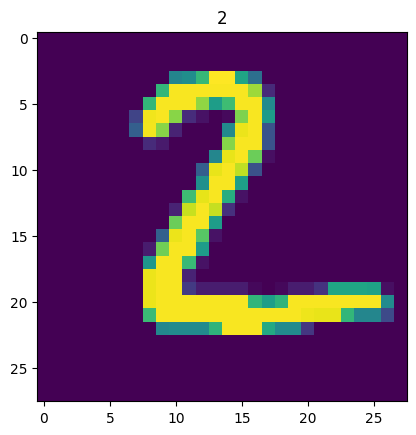

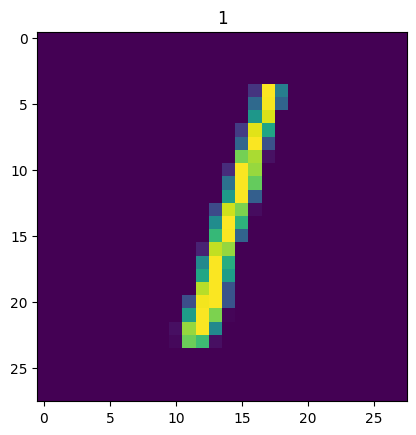

In [210]:
import numpy as np

for i in range(3):
    image = x_test[i]
    y_pred = model_1.predict(np.array([image]), verbose=0)
    plt.imshow(image)
    plt.title(y_pred.argmax())
    plt.show()